<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [12]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [13]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 8A39-AC85

 Directory of C:\Users\ThePi\Desktop\Python\Lambda\DS-Unit-4-Sprint-1-NLP\module2-vector-representations

03/10/2020  04:04 PM    <DIR>          .
03/10/2020  04:04 PM    <DIR>          ..
03/10/2020  01:12 PM    <DIR>          .ipynb_checkpoints
03/10/2020  02:59 PM    <DIR>          data
03/10/2020  04:04 PM            22,969 LS_DS_412_Vector_Representations_Assignment.ipynb
03/10/2020  01:12 PM            79,923 LS_DS_412_Vector_Representations_Lecture.ipynb
03/09/2020  12:17 PM    <DIR>          previous_lectures
               2 File(s)        102,892 bytes
               5 Dir(s)  113,447,923,712 bytes free


In [14]:
jobs = pd.read_csv('./data/job_listings.csv')
jobs = jobs[jobs['title'] == 'Data Scientist'].drop(['title', jobs.columns.to_list()[0]], axis=1).reset_index().drop(['index'], axis=1)
jobs.head()

,description
0,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
1,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
2,b'<div>Create various Business Intelligence An...
3,"b""Everytown for Gun Safety, the nation's large..."
4,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2..."


In [15]:
from bs4 import BeautifulSoup
import re

strip_html = lambda x: BeautifulSoup(x).get_text()

clean_text = lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x)

In [16]:
jobs['description'] = jobs['description'].apply(strip_html).apply(clean_text)

## 2) Use Spacy to tokenize the listings 

In [17]:
nlp = spacy.load("en_core_web_lg")

s_tokenize = lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True)]

In [18]:
display(jobs.head())
jobs['tokens'] = jobs['description'].apply(s_tokenize)
jobs.head()

,description
0,b4969 6756 a monthContractUnder the general s...
1,bLocation USA xe2x80x93 multiple locationsn2 y...
2,bCreate various Business Intelligence Analytic...
3,bEverytown for Gun Safety the nations largest ...
4,bnfosysxe2x80x93 Data Analytics xe2x80x93 Sr ...


,description,tokens
0,b4969 6756 a monthContractUnder the general s...,"[b4969, , 6756, monthcontractunder, general, ..."
1,bLocation USA xe2x80x93 multiple locationsn2 y...,"[bLocation, USA, xe2x80x93, multiple, location..."
2,bCreate various Business Intelligence Analytic...,"[bcreate, Business, Intelligence, Analytical, ..."
3,bEverytown for Gun Safety the nations largest ...,"[bEverytown, Gun, Safety, nation, large, gun, ..."
4,bnfosysxe2x80x93 Data Analytics xe2x80x93 Sr ...,"[bnfosysxe2x80x93, Data, , analytic, xe2x80x9..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [19]:
from collections import Counter

word_counts = Counter()
jobs['tokens'].apply(lambda x: word_counts.update(x))
common = word_counts.most_common(10)
common

[('datum', 934),
 (' ', 469),
 ('work', 439),
 ('business', 398),
 ('experience', 353),
 ('team', 341),
 ('model', 288),
 ('data', 247),
 ('Data', 236),
 ('analysis', 213)]

## 4) Visualize the most common word counts

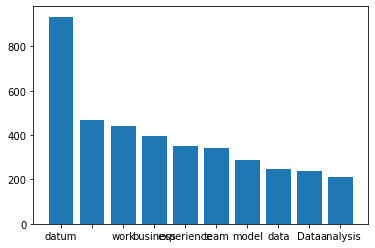

In [20]:
x = [i[0] for i in common]
y = [i[1] for i in common]
plt.bar(x, y);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [28]:
vect = CountVectorizer()
dtm = vect.fit_transform(jobs['description'].to_list())
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm

(150, 2)


,10,100,100000,100908,10napply,10nmckesson,10nprovide,10x,12,1200,...,youxe2x80x99d,youxe2x80x99ll,youxe2x80x99re,youxe2x80x99ve,yrs,yrsnnposition,zenreach,zeus,zheng,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,1,0,0,0,0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 